# Data Cleaning
---

# 1. Setting the stage
Load the datasets. 

In [1]:
#Data paths

pre <- "/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/datasets/CASE STUDY - Livestream pre FY23.csv" #nolint
post <- "/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/datasets/CASE STUDY - Livestream post FY23.csv" #nolint

In [2]:
# create df_pre and df_post
library(readr)

data_pre <- read.csv(pre, header = TRUE, sep = ",")
data_post <- read.csv(post, header = TRUE, sep = ",")

In [3]:
#create a copy of the original dataframe
library(dplyr)

# copy the original dataframe
df_pre <- data.frame(data_pre)
df_post <- data.frame(data_post)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# 2. The pre surveys cleaning 

In [4]:
#check the first 5 rows of the dataset and total number of responses
head(df_pre)
total_responses <- nrow(df_pre)
cat("There are", total_responses, "responses in the dataset.")

,Finished,RecordedDate,Q1_a,Q2_a,Q3_a,Q4_a,id
,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,TRUE,2022-09-21 13:13,,,,,
2,TRUE,2022-09-21 13:14,Strongly disagree,Agree,Somewhat agree,Agree,O_A_09_L
3,TRUE,2022-09-21 13:14,Agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,A_N_02_8
4,TRUE,2022-09-21 13:15,Strongly disagree,Strongly disagree,Somewhat agree,Neither agree nor disagree,M_U_07_1
5,TRUE,2022-09-21 13:15,Somewhat disagree,Disagree,Agree,Somewhat agree,A_E_06_A
6,TRUE,2022-09-21 13:16,Neither agree nor disagree,Agree,Agree,Agree,Y_O_04_1


There are 10925 responses in the dataset.

From this point on, I follow the seven dimensions of data quality for both datasets
- **Completeness.** Completeness measures the degree to which all expected records in a dataset
are present. At a data element level, completeness is the degree to which all
records have data populated when expected.
- **Uniqueness.** Uniqueness measures the degree to which the records in a dataset are not
duplicated.
- **Timeliness.** Timeliness measures the degree to which the data in a data is up to date.
- **Validity.** Validity measures the degree to which the records in a dataset are valid.
- **Accuracy.** Accuracy measures the degree to which data is correct and represents the truth.
- **Consistency.** Consistency is a data quality dimension that measures the degree to which
data is the same across all instances of the data. Consistency can be
measured by setting a threshold for how much difference there can be
between two datasets. In this case, that would be the pre and post survey matching rate. 
- **Relevance.** Relevance is a data quality dimension that measures the degree to which the data is suitable for analysis required. 


**Step 1: Completeness: Remove incomplete responses, keep only completed responses from participants.**

In [5]:
# use column "Finished to determine if the record is complete or not"
#return rows where finished = False and check the structure of the data
incomplete <- (df_pre[df_pre$Finished == FALSE, ])
cat("Number of incomplete records: ", nrow(incomplete), "\n")

Number of incomplete records:  2878 


In [6]:
# Remove incomplete responses from df_pre. These are rows where column 'Finished' = False. # nolint
# remove rows from df_pre where column Finished = False
# count rows where column Finished = False
count_false_finished <- sum(df_pre$Finished == FALSE)
cat("There are:", count_false_finished, "incomplete responses in df_pre. These will be removed from the dataframe. \n") # nolint

There are: 2878 incomplete responses in df_pre. These will be removed from the dataframe. 


In [7]:
# Remove rows where the user did not finish the survey
df_pre <- df_pre[df_pre$Finished != FALSE, ]
count_false_finished <- nrow(df_pre[df_pre$Finished == FALSE, ])
count_true_finished <- nrow(df_pre[df_pre$Finished != FALSE, ])

cat(count_false_finished, "responses are not marked as finished.")
cat(count_true_finished, "responses are marked as finished.")

0 responses are not marked as finished.8047 responses are marked as finished.

`There are 8047 datapoints indicated as complete. Check if there are datapoints indicated as 'finished' that are not complete/ has missing values. In practice, some missing values can be imputed, but as per the instructions, I will remove those from the dataset.`

In [8]:
#check for any blank or NA values in 'Q1_a'...'id' columns

library(dplyr)

# Filter rows where at least one of the columns 'Q1_a'...'id' is blank or NA

# function to do the filtering
filter_blank_rows <- function(input_df) {
  blank_rows <- input_df[
    is.na(input_df$Q1_a) | input_df$Q1_a == "" | #nolint
    is.na(input_df$Q2_a) | input_df$Q2_a == "" | #nolint
    is.na(input_df$Q3_a) | input_df$Q3_a == "" |
    is.na(input_df$Q4_a) | input_df$Q4_a == "" |
    is.na(input_df$id)   | input_df$id == "", ]
  
  return(blank_rows)
}

# Return rows for the selected subset. specified columns are not blank
blank_rows <- filter_blank_rows(df_pre)
#count rows
count_blank_rows <- nrow(blank_rows)
cat("There are: ", count_blank_rows, "responses where any of the subset columns contains a blank or NA value") #nolint

There are:  582 responses where any of the subset columns contains a blank or NA value

In [9]:
# remove the rows with missing and NA values from the dataset
# the complete.cases() function returns a logical vector indicating which cases are complete.\ #nolint
#THIS IS THE KEY FUNCTION FOR THIS STEP but seem not to get the job done.

In [10]:
# remove the rows with missing and NA values from the dataset
# function to remove blank and NA rows
remove_blank_rows <- function(input_df) {
  non_blank_rows <- input_df[
    !(is.na(input_df$Q1_a) | input_df$Q1_a == "" | #nolint
      is.na(input_df$Q2_a) | input_df$Q2_a == "" | #nolint
      is.na(input_df$Q3_a) | input_df$Q3_a == "" |
      is.na(input_df$Q4_a) | input_df$Q4_a == "" |
      is.na(input_df$id)   | input_df$id == ""), ]
  
  return(non_blank_rows)
}

df_pre <- remove_blank_rows(df_pre)
#check the structure and count of complete responses in df_pre
head(df_pre)
cat("Number of complete responses:", nrow(df_pre))

,Finished,RecordedDate,Q1_a,Q2_a,Q3_a,Q4_a,id
,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,TRUE,2022-09-21 13:14,Strongly disagree,Agree,Somewhat agree,Agree,O_A_09_L
3,TRUE,2022-09-21 13:14,Agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,A_N_02_8
4,TRUE,2022-09-21 13:15,Strongly disagree,Strongly disagree,Somewhat agree,Neither agree nor disagree,M_U_07_1
5,TRUE,2022-09-21 13:15,Somewhat disagree,Disagree,Agree,Somewhat agree,A_E_06_A
6,TRUE,2022-09-21 13:16,Neither agree nor disagree,Agree,Agree,Agree,Y_O_04_1
7,TRUE,2022-09-21 13:16,Agree,Agree,Somewhat agree,Somewhat agree,A_Y_06_A


Number of complete responses: 7465

In [11]:
# Quality Control for completeness
# 1. Check is finished column is all TRUE
incomplete <- (df_pre[df_pre$Finished == FALSE, ])
cat("Number of incomplete records: ", nrow(incomplete), "\n")

# 2. check subset of columns for missing values
# Filter rows where at least one of the columns 'Q1_a'...'id' is blank or NA. Here I used the funtion 'filter_blank_rows' from above. 
blank_rows <- filter_blank_rows(df_pre)
#count rows
count_blank_rows <- nrow(blank_rows)
cat("There are: ", count_blank_rows, "responses where any of the subset columns contains a blank or NA value") #nolint


Number of incomplete records:  0 
There are:  0 responses where any of the subset columns contains a blank or NA value

In [12]:
# calculate completion rate

df_1 <- data.frame(data_pre)
incomplete <- (df_1[df_1$Finished == FALSE, ])
df_1 <- df_1[df_1$Finished == TRUE, ]
blank_or_na_rows <- filter_blank_rows(df_1)
completion_rate <- (nrow(blank_or_na_rows) + nrow(incomplete))/nrow(data_pre)

cat("Pre surveys had", (1-completion_rate)*100, "% completion rate.\n")


Pre surveys had 68.32952 % completion rate.


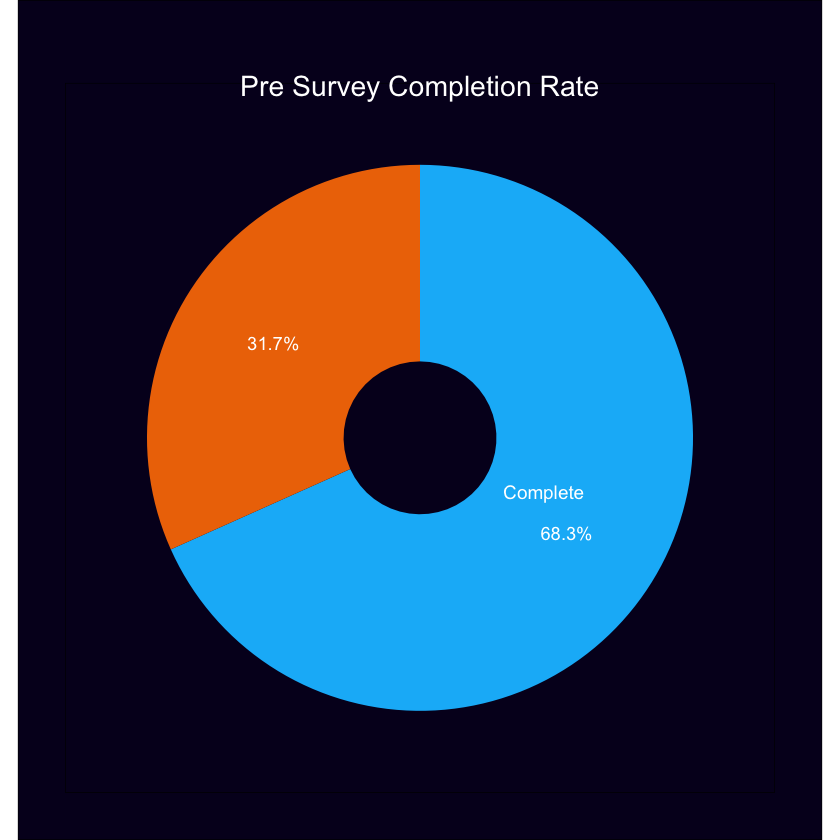

In [13]:
# plot completion rate

library(ggplot2)
library(dplyr)
# Calculate the complete rate and round it to one decimal place
complete <- round((1 - completion_rate) * 100, 1)
# data
df <- data.frame(
  group = c("Complete", " "),
  value = c(complete, 100 - complete)
)

# Small hole
hsize <- 1

df <- df %>% 
  mutate(x = hsize)

ggplot(df, aes(x = x, y = value, fill = group)) +
  geom_col() +
  geom_text(aes(label = paste0(value, "%")), position = position_stack(vjust = 0.5), color = "#ffffff") +
  geom_text(aes(label = group, x = hsize -0.2), color = "white", size = 4, hjust = -2.5) +
  coord_polar(theta = "y") +
  xlim(c(0.2, hsize + 0.5)) +
  scale_fill_manual(values = c("Complete" = "#0cb9f8", " " = "#ee7503")) +
  theme_void() +
  theme(legend.position = "none",
        plot.background = element_rect(fill = "#050022"),
        panel.background = element_rect(fill = "#050022"),
        plot.margin = unit(c(1, 1, 1, 1), "cm"),
        axis.text = element_blank(),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
        plot.title = element_text(color = "white", size = 17, lineheight = 5, vjust = -2, hjust = 0.5))+
        labs(title = "Pre Survey Completion Rate")
        #+ ggsave("/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/assets/pre_completion_rate.png", width = 8, height = 6, units = "in")

Step 2: - **Uniqueness.** Uniqueness measures the degree to which the records in a dataset are not duplicated.

In [14]:
#1. First we check if there are duplicates in the data. 
all_duplicates <- df_pre[duplicated(df_pre) | duplicated(df_pre, fromLast = TRUE), ]

# Print the all duplicate rows
all_duplicates

,Finished,RecordedDate,Q1_a,Q2_a,Q3_a,Q4_a,id
,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4542,TRUE,2023-04-14 10:46,Agree,Agree,Disagree,Disagree,N_U_05_R
4554,TRUE,2023-04-14 10:46,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,E_M_05_S
4557,TRUE,2023-04-14 10:46,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,E_M_05_S
4692,TRUE,2023-04-14 10:46,Agree,Agree,Disagree,Disagree,N_U_05_R


In [15]:
# duplication rate
total_rows <- nrow(df_pre)
duplicated_rows <- sum(duplicated(df_pre) | duplicated(df_pre, fromLast = TRUE))

duplication_rate <- duplicated_rows / total_rows

# Print the duplication rate
cat("Duplication Rate:", duplication_rate * 100, "%")

Duplication Rate: 0.05358339 %

In [16]:
#remove duplicates, Keep only most recent records. 

library(dplyr)
library(lubridate)

# I'm using lubridate to convert the RecordedDate column to a date object

remove_duplicates_keep_most_recent <- function(input_df, id_col, date_col) { #nolint
  # This function removes duplicates from a dataframe, keeping only the most recent record #nolint
  unique_df <- input_df %>%
    mutate(!!sym(date_col) := ymd_hm(!!sym(date_col))) %>% #nolint
    arrange(!!sym(id_col), desc(!!sym(date_col))) %>%
    distinct(!!sym(id_col), .keep_all = TRUE)
  #nolint
  return(unique_df)
}

df_pre <- remove_duplicates_keep_most_recent(df_pre, id_col = "id", date_col = "RecordedDate") #nolint

# Qc check for duplicates
all_duplicates <- df_pre[duplicated(df_pre) | duplicated(df_pre, fromLast = TRUE), ] #nolint

# Print the all duplicate rows
cat("There are", nrow(all_duplicates), "duplicates in the dataset")


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




There are 0 duplicates in the dataset

**Step 3:**
- **Timeliness.** Timeliness measures the degree to which the data in a data is up to date.
- **Validity.** Validity measures the degree to which the records in a dataset are valid.

- `The instructions on the assignment didn't include timeliness. The assumption here is that the data is from the same time period.`
- `For validity, this will be checked upon merging with the post survey data. Because the instructions say to keep the most recent response from the merged df. The assumption is that the most recent response is the most valid. Its not logical to assert a validity test at this point before merging.`

In [17]:
#check for start and end date of survey
start_date <- min(df_pre$RecordedDate)
end_date <- max(df_pre$RecordedDate)

# Convert epoch timestamps to human-readable time since they are in UTC in the previous step #nolint
start_date_human <- as.POSIXct(start_date, origin = "1970-01-01", tz = "UTC")
end_date_human <- as.POSIXct(end_date, origin = "1970-01-01", tz = "UTC")

# Print the time period
cat("Survey Time Period:", format(start_date_human, "%Y-%m-%d %H:%M:%S"), "to", format(end_date_human, "%Y-%m-%d %H:%M:%S")) #nolint

Survey Time Period: 2022-09-21 13:14:00 to 2023-06-25 15:19:00

**Step 4:** 
- **Accuracy.** Accuracy measures the degree to which data is correct and represents the truth.
- **Consistency.** Consistency is a data quality dimension that measures the degree to which
data is the same across all instances of the data. Consistency can be
measured by setting a threshold for how much difference there can be
between two datasets. In this case, that would be the pre and post survey matching rate. 
- **Relevance.** Relevance is a data quality dimension that measures the degree to which the data is suitable for analysis required. 


__Verdict__
- **Accuracy.** The assumption is that the data is correct and represents the truth. Further domain knowledge is required to validate accuracy.
- **Consistency.** This will be tested by comparing the pre and post survey matching rate.
- **Relevance.** The data is suitable for the analysis required.

In [18]:
# Export df_pre to a CSV file
write.csv(df_pre, "/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/data_output/df_pre.csv", row.names = FALSE)

# 3. The post surveys cleaning

In [19]:
#check the first 5 rows of the dataset and total number of responses
head(df_post, 5)
total_responses <- nrow(df_post)
cat("There are", total_responses, "responses in the dataset.")

,Finished,RecordedDate,Q1_b,Q2_b,Q3_b,Q4_b,Q5,Q6,Q7,Q8,id
,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,TRUE,2022-09-21 13:55,Neither agree nor disagree,Somewhat agree,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,5,A_E_06_A
2,TRUE,2022-09-21 13:57,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,,5,I_K_10_1
3,TRUE,2022-09-21 13:57,Agree,Disagree,Somewhat agree,Agree,Agree,Agree,Neither agree nor disagree,7,A_N_09_D
4,TRUE,2022-09-21 13:58,Agree,Disagree,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,5,L_T_12_A
5,FALSE,2022-09-24 13:14,,,,,,,,NA,


There are 6856 responses in the dataset.

**Step 1: Completeness: Remove incomplete responses, keep only completed responses from participants.**

In [20]:
# use column "Finished to determine if the record is complete or not"
#return rows where finished = False and check the structure of the data
incomplete <- (df_post[df_post$Finished == FALSE, ])
cat("Number of incomplete records: ", nrow(incomplete), "\n")

Number of incomplete records:  3040 


In [21]:
# Remove incomplete responses from df_post. These are rows where column 'Finished' = False. # nolint
# remove rows from df_pre where column Finished = False
# count rows where column Finished = False
count_false_finished <- sum(df_post$Finished == FALSE)
cat("There are:", count_false_finished, "incomplete responses in df_post. These will be removed from the dataframe. \n") # nolint

There are: 3040 incomplete responses in df_post. These will be removed from the dataframe. 


In [22]:
# Remove rows where the user did not finish the survey

#function to check if the user finished the survey and removes rows where the user did not finish the survey, returns a dataframe with only finished responses
check_finished_responses <- function(input_df) {
  input_df <- input_df[input_df$Finished != FALSE, ]
  count_false_finished <- nrow(input_df[input_df$Finished == FALSE, ])
  count_true_finished <- nrow(input_df[input_df$Finished != FALSE, ])

  return(input_df)
  return(cat(count_false_finished, "responses are not marked as finished.\n"))
  return(cat(count_true_finished, "responses are marked as finished.\n"))
}

# call function to remove rows where the user did not finish the survey
df_post <- check_finished_responses(df_post)
head(df_post)
cat(nrow(df_post), "responses are marked as finished.\n")


,Finished,RecordedDate,Q1_b,Q2_b,Q3_b,Q4_b,Q5,Q6,Q7,Q8,id
,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,TRUE,2022-09-21 13:55,Neither agree nor disagree,Somewhat agree,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,5,A_E_06_A
2,TRUE,2022-09-21 13:57,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,,5,I_K_10_1
3,TRUE,2022-09-21 13:57,Agree,Disagree,Somewhat agree,Agree,Agree,Agree,Neither agree nor disagree,7,A_N_09_D
4,TRUE,2022-09-21 13:58,Agree,Disagree,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,5,L_T_12_A
14,TRUE,2022-10-03 9:28,Strongly agree,Strongly agree,Somewhat agree,Somewhat agree,Agree,Agree,Agree,10,Y_G_08_W
15,TRUE,2022-10-03 9:29,Strongly disagree,Strongly agree,Somewhat agree,Somewhat disagree,Disagree,Agree,Agree,2,A_N_11_D


3816 responses are marked as finished.


In [23]:
#check for any blank or NA values in 'Q1_b'...'id' columns

library(dplyr)

# Filter rows where at least one of the columns 'Q1_b'...'id' is blank or NA

# function to do the filtering
filter_blank_rows <- function(input_df) {
  blank_rows <- input_df[
                        is.na(input_df$Q1_b) | input_df$Q1_b == "" |
                        is.na(input_df$Q2_b) | input_df$Q2_b == "" |
                        is.na(input_df$Q3_b) | input_df$Q3_b == "" |
                        is.na(input_df$Q4_b) | input_df$Q4_b == "" |
                        is.na(input_df$Q5) | input_df$Q5 == "" |
                        is.na(input_df$Q6) | input_df$Q6 == "" |
                        is.na(input_df$Q7) | input_df$Q7 == "" |
                        is.na(input_df$Q8) | input_df$Q8 == "" |
                        is.na(input_df$id)   | input_df$id == "", ]
  
  return(blank_rows)
}

# Return rows for the selected subset. specified columns are not blank
blank_rows <- filter_blank_rows(df_post)
#count rows
count_blank_rows <- nrow(blank_rows)
cat("There are: ", count_blank_rows, "responses where any of the subset columns contains a blank or NA value") #nolint

There are:  298 responses where any of the subset columns contains a blank or NA value

In [24]:
# remove the rows with missing and NA values from the dataset
# function to remove blank and NA rows
remove_blank_rows <- function(input_df) {
  non_blank_rows <- input_df[
                      !(is.na(input_df$Q1_b) | input_df$Q1_b == "" | #nolint
                        is.na(input_df$Q2_b) | input_df$Q2_b == "" | #nolint
                        is.na(input_df$Q3_b) | input_df$Q3_b == "" |
                        is.na(input_df$Q4_b) | input_df$Q4_b == "" |
                        is.na(input_df$Q5) | input_df$Q5 == "" |
                        is.na(input_df$Q6) | input_df$Q6 == "" |
                        is.na(input_df$Q7) | input_df$Q7 == "" |
                        is.na(input_df$Q8) | input_df$Q8 == "" |
                        is.na(input_df$id)   | input_df$id == ""), ]
  return(non_blank_rows)
}

df_post <- remove_blank_rows(df_post)
#check the structure and count of complete responses in df_pre
head(df_post)
cat("Number of complete responses:", nrow(df_post))

,Finished,RecordedDate,Q1_b,Q2_b,Q3_b,Q4_b,Q5,Q6,Q7,Q8,id
,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,TRUE,2022-09-21 13:55,Neither agree nor disagree,Somewhat agree,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,5,A_E_06_A
3,TRUE,2022-09-21 13:57,Agree,Disagree,Somewhat agree,Agree,Agree,Agree,Neither agree nor disagree,7,A_N_09_D
4,TRUE,2022-09-21 13:58,Agree,Disagree,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,5,L_T_12_A
14,TRUE,2022-10-03 9:28,Strongly agree,Strongly agree,Somewhat agree,Somewhat agree,Agree,Agree,Agree,10,Y_G_08_W
15,TRUE,2022-10-03 9:29,Strongly disagree,Strongly agree,Somewhat agree,Somewhat disagree,Disagree,Agree,Agree,2,A_N_11_D
16,TRUE,2022-10-03 9:40,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Agree,Agree,Agree,8,E_H_01_F


Number of complete responses: 3518

In [25]:
# Quality Control for completeness
# 1. Check is finished column is all TRUE
incomplete <- (df_post[df_post$Finished == FALSE, ])
cat("Number of incomplete records: ", nrow(incomplete), "\n")

# 2. check subset of columns for missing values
# Filter rows where at least one of the columns 'Q1_b'...'id' is blank or NA. Here I used the funtion 'filter_blank_rows' from above. 
blank_rows <- filter_blank_rows(df_post)
#count rows
count_blank_rows <- nrow(blank_rows)
cat("There are: ", count_blank_rows, "responses where any of the subset columns contains a blank or NA value") #nolint


Number of incomplete records:  0 
There are:  0 responses where any of the subset columns contains a blank or NA value

In [26]:
# calculate completion rate

df_1 <- data.frame(data_post)
incomplete <- (df_1[df_1$Finished == FALSE, ]) # incomplete surveys
df_1 <- df_1[df_1$Finished == TRUE, ] # filter out incomplete surveys
blank_or_na_rows <- filter_blank_rows(df_1) # filter out blank rows from function before
completion_rate <- (nrow(blank_or_na_rows) + nrow(incomplete))/nrow(data_post)

cat("Post surveys had", (1-completion_rate)*100, "% completion rate.\n")


Post surveys had 51.31272 % completion rate.


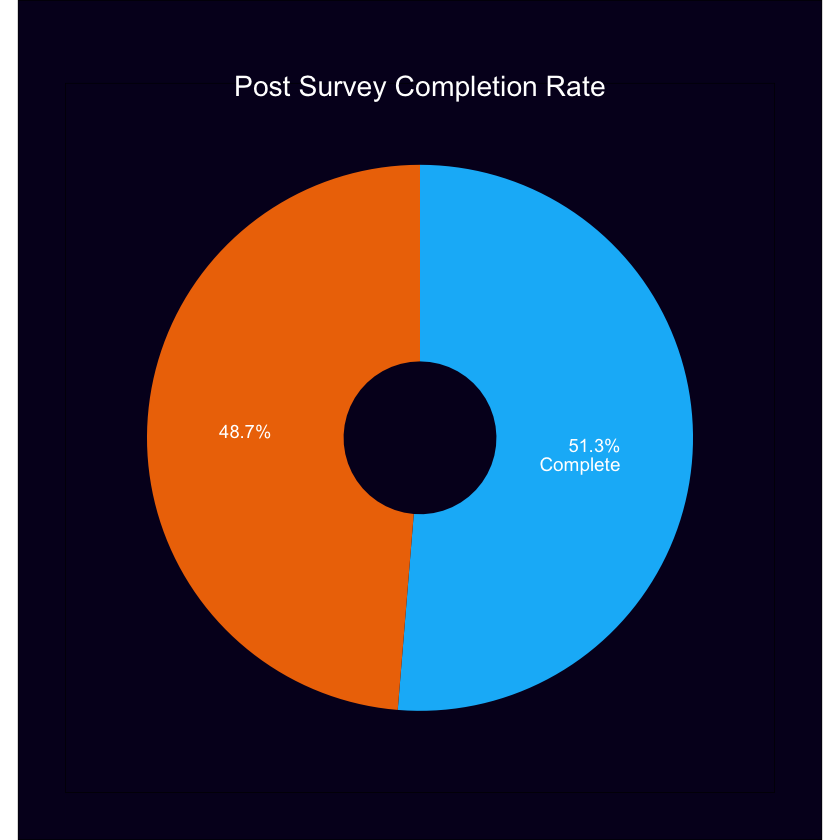

In [34]:
# plot completion rate

library(ggplot2)
library(dplyr)
# Calculate the complete rate and round it to one decimal place
complete <- round((1 - completion_rate) * 100, 1)
# data
df <- data.frame(
  group = c("Complete", " "),
  value = c(complete, 100 - complete)
)

# Small hole
hsize <- 1

df <- df %>% 
  mutate(x = hsize)

ggplot(df, aes(x = x, y = value, fill = group)) +
  geom_col() +
  geom_text(aes(label = paste0(value, "%")), position = position_stack(vjust = 0.5), color = "#ffffff") +
  geom_text(aes(label = group, x = hsize -0.68), color = "white", size = 4, hjust = -1.5) +
  coord_polar(theta = "y") +
  xlim(c(0.2, hsize + 0.5)) +
  scale_fill_manual(values = c("Complete" = "#0cb9f8", " " = "#ee7503")) +
  theme_void() +
  theme(legend.position = "none",
        plot.background = element_rect(fill = "#050022"),
        plot.margin = unit(c(1, 1, 1, 1), "cm"),
        panel.background = element_rect(fill = "#050022"),
        axis.text = element_blank(),
        axis.title = element_blank(),
        axis.ticks = element_blank(), 
        plot.title = element_text(color = "white", size = 17, lineheight = 5, vjust = -2, hjust = 0.5))+
        labs(title = "Post Survey Completion Rate")
        #  + ggsave("/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/assets/post_completion_rate.png", width = 8, height = 6, units = "in")



Step 2: - **Uniqueness.** Uniqueness measures the degree to which the records in a dataset are not duplicated.

In [28]:
#1. First we check if there are duplicates in the data. 
all_duplicates <- df_post[duplicated(df_post) | duplicated(df_post, fromLast = TRUE), ]

# Print the all duplicate rows
all_duplicates


,Finished,RecordedDate,Q1_b,Q2_b,Q3_b,Q4_b,Q5,Q6,Q7,Q8,id
,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
2873,TRUE,2023-04-14 10:51,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Strongly agree,Strongly agree,5,E_M_05_S
2914,TRUE,2023-04-14 10:51,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Strongly agree,Strongly agree,5,E_M_05_S


In [29]:
# duplication rate
total_rows <- nrow(df_post)
duplicated_rows <- sum(duplicated(df_post) | duplicated(df_post, fromLast = TRUE))

duplication_rate <- duplicated_rows / total_rows

# Print the duplication rate
cat("Duplication Rate:", duplication_rate * 100, "%")

Duplication Rate: 0.05685048 %

In [30]:
#remove duplicates, Keep only most recent records.
# I'm using a function 'remove_duplicates_keep_most_recent' defined before.  

df_post <- remove_duplicates_keep_most_recent(df_post, "id", "RecordedDate")

# Qc check for duplicates 
all_duplicates <- df_post[duplicated(df_post) | duplicated(df_post, fromLast = TRUE), ]

# Print the all duplicate rows
cat("There are", nrow(all_duplicates), "duplicates in the dataset")

There are 0 duplicates in the dataset

**Step 3:**
- **Timeliness.** Timeliness measures the degree to which the data in a data is up to date.
- **Validity.** Validity measures the degree to which the records in a dataset are valid.

- `The instructions on the assignment didn't include timeliness. The assumption here is that the data is from the same time period.`
- `For validity, this will be checked upon merging with the pre survey data. Because the instructions say to keep the most recent response from the merged df. The assumption is that the most recent response is the most valid. Its not logical to assert a validity test at this point before merging.`

In [31]:
#check for start and end date of survey
start_date <- min(df_post$RecordedDate)
end_date <- max(df_post$RecordedDate)

# Convert epoch timestamps to human-readable time since they are in UTC in the previous step #nolint
start_date_human <- as.POSIXct(start_date, origin = "1970-01-01", tz = "UTC")
end_date_human <- as.POSIXct(end_date, origin = "1970-01-01", tz = "UTC")

# Print the time period
cat("Survey Time Period:", format(start_date_human, "%Y-%m-%d %H:%M:%S"), "to", format(end_date_human, "%Y-%m-%d %H:%M:%S")) #nolint

Survey Time Period: 2022-09-21 13:55:00 to 2023-06-25 15:20:00

**Step 4:** 
- **Accuracy.** Accuracy measures the degree to which data is correct and represents the truth.
- **Consistency.** Consistency is a data quality dimension that measures the degree to which
data is the same across all instances of the data. Consistency can be
measured by setting a threshold for how much difference there can be
between two datasets. In this case, that would be the pre and post survey matching rate. 
- **Relevance.** Relevance is a data quality dimension that measures the degree to which the data is suitable for analysis required. 


__Verdict__
- **Accuracy.** The assumption is that the data is correct and represents the truth. Further domain knowledge is required to validate accuracy.
- **Consistency.** This will be tested by comparing the pre and pre survey matching rate.
- **Relevance.** The data is suitable for the analysis required.

In [37]:
# Export df_post to a CSV file
write.csv(df_post, "/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/data_output/df_post.csv", row.names = FALSE)

# 4. Match any pre and post data from the same respondent using the provided IDs

**Step 4.1 set the stage and explore the data**

In [36]:
# check head for both pre and post
head(df_pre)
cat(nrow(df_pre))
head(df_post)
cat(nrow(df_post))

,Finished,RecordedDate,Q1_a,Q2_a,Q3_a,Q4_a,id
,<lgl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>
1,TRUE,2022-11-21 17:38:00,Agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,._O_04_A
2,TRUE,2023-05-01 12:23:00,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,6_9_02_L
3,TRUE,2023-05-30 08:49:00,Disagree,Disagree,Disagree,Disagree,6_9_12_L
4,TRUE,2023-01-25 09:08:00,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,:_!_09_K
5,TRUE,2023-05-15 14:05:00,Agree,Agree,Agree,Agree,A_A_01_A
6,TRUE,2023-05-18 09:31:00,Neither agree nor disagree,Disagree,Agree,Strongly agree,A_A_01_B


6358

,Finished,RecordedDate,Q1_b,Q2_b,Q3_b,Q4_b,Q5,Q6,Q7,Q8,id
,<lgl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,TRUE,2023-05-02 13:54:00,Strongly disagree,Strongly disagree,Strongly disagree,Neither agree nor disagree,Strongly agree,Strongly agree,Agree,10,6_E_07_A
2,TRUE,2023-05-09 09:49:00,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,0,A_8_12_1
3,TRUE,2023-03-07 16:20:00,Strongly disagree,Agree,Somewhat agree,Somewhat disagree,Somewhat disagree,Somewhat agree,Agree,9,A_A_01_A
4,TRUE,2023-05-01 13:02:00,Somewhat disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Strongly agree,Strongly agree,10,A_A_01_C
5,TRUE,2023-05-02 14:58:00,Agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Somewhat agree,7,A_A_01_D
6,TRUE,2023-04-24 17:01:00,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Somewhat agree,7,A_A_01_M


3226

**Step 4.2: Merging the dataframes**

In [38]:
# create a new column called 'Pre' on the df_pre dataframe and set to 'pre'
df_pre$Pre <- 'pre'

# create a new column called 'Post' on the df_post dataframe and set to 'post'
df_post$Post <- 'post'

In [39]:
nrow(df_pre)
nrow(df_post)

[1] 6358

[1] 3226

In [40]:
# merge two dataframes into one on the column 'id'
merged_df <- merge(df_pre, df_post, by = 'id', all = TRUE)
head(merged_df)

,id,Finished.x,RecordedDate.x,Q1_a,Q2_a,Q3_a,Q4_a,Pre,Finished.y,RecordedDate.y,Q1_b,Q2_b,Q3_b,Q4_b,Q5,Q6,Q7,Q8,Post
,<chr>,<lgl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,._O_04_A,TRUE,2022-11-21 17:38:00,Agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,pre,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,6_9_02_L,TRUE,2023-05-01 12:23:00,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,pre,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,6_9_12_L,TRUE,2023-05-30 08:49:00,Disagree,Disagree,Disagree,Disagree,pre,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,6_E_07_A,NA,NA,NA,NA,NA,NA,NA,TRUE,2023-05-02 13:54:00,Strongly disagree,Strongly disagree,Strongly disagree,Neither agree nor disagree,Strongly agree,Strongly agree,Agree,10,post
5,:_!_09_K,TRUE,2023-01-25 09:08:00,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,pre,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,A_8_12_1,NA,NA,NA,NA,NA,NA,NA,TRUE,2023-05-09 09:49:00,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,0,post


In [41]:
# create a new column called 'Matched' in the dataframe. Fill with matched where column 'Pre' = 'pre' and 'Post' = 'post'
merged_df$Matched <- ifelse(merged_df$Pre == 'pre' & merged_df$Post == 'post', 'matched', '')

nrow(merged_df)


[1] 6978

In [42]:
library(dplyr)

# Filter rows where 'Matched' column is 'matched'
matched_rows <- merged_df %>%
  filter(Matched == 'matched')

head(matched_rows)
cat("There are ", nrow(matched_rows), "macthing survery responses.")

,id,Finished.x,RecordedDate.x,Q1_a,Q2_a,Q3_a,Q4_a,Pre,Finished.y,RecordedDate.y,Q1_b,Q2_b,Q3_b,Q4_b,Q5,Q6,Q7,Q8,Post,Matched
,<chr>,<lgl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,A_A_01_A,TRUE,2023-05-15 14:05:00,Agree,Agree,Agree,Agree,pre,TRUE,2023-03-07 16:20:00,Strongly disagree,Agree,Somewhat agree,Somewhat disagree,Somewhat disagree,Somewhat agree,Agree,9,post,matched
2,A_A_01_C,TRUE,2023-05-01 12:21:00,Somewhat disagree,Disagree,Somewhat agree,Somewhat disagree,pre,TRUE,2023-05-01 13:02:00,Somewhat disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Strongly agree,Strongly agree,10,post,matched
3,A_A_01_D,TRUE,2023-05-02 14:13:00,Agree,Somewhat agree,Somewhat agree,Somewhat disagree,pre,TRUE,2023-05-02 14:58:00,Agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Somewhat agree,7,post,matched
4,A_A_01_M,TRUE,2023-04-24 16:19:00,Somewhat disagree,Somewhat agree,Neither agree nor disagree,Somewhat disagree,pre,TRUE,2023-04-24 17:01:00,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Somewhat agree,7,post,matched
5,A_A_02_A,TRUE,2023-05-03 13:03:00,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,pre,TRUE,2023-05-03 14:18:00,Agree,Agree,Somewhat agree,Somewhat disagree,Agree,Agree,Strongly agree,10,post,matched
6,A_A_02_C,TRUE,2023-03-26 15:06:00,Agree,Agree,Agree,Agree,pre,TRUE,2023-03-26 15:55:00,Agree,Agree,Agree,Agree,Agree,Agree,Agree,10,post,matched


There are  2606 macthing survery responses.

In [43]:
#Quality Control
#investigate matching criteria
count_matched <- merged_df %>%
  filter(Matched == 'matched') %>%
  nrow()

# Count the number of rows in the original df_pre
count_df_pre <- nrow(df_pre)
count_df_post <- nrow(df_post)

# Print the counts
cat("Number of 'matching' entries:", count_matched, "\n")
cat("Number of rows in df_pre:", count_df_pre, "\n")
cat("Number of rows in df_post:", count_df_post, "\n")

Number of 'matching' entries: 2606 
Number of rows in df_pre: 6358 
Number of rows in df_post: 3226 


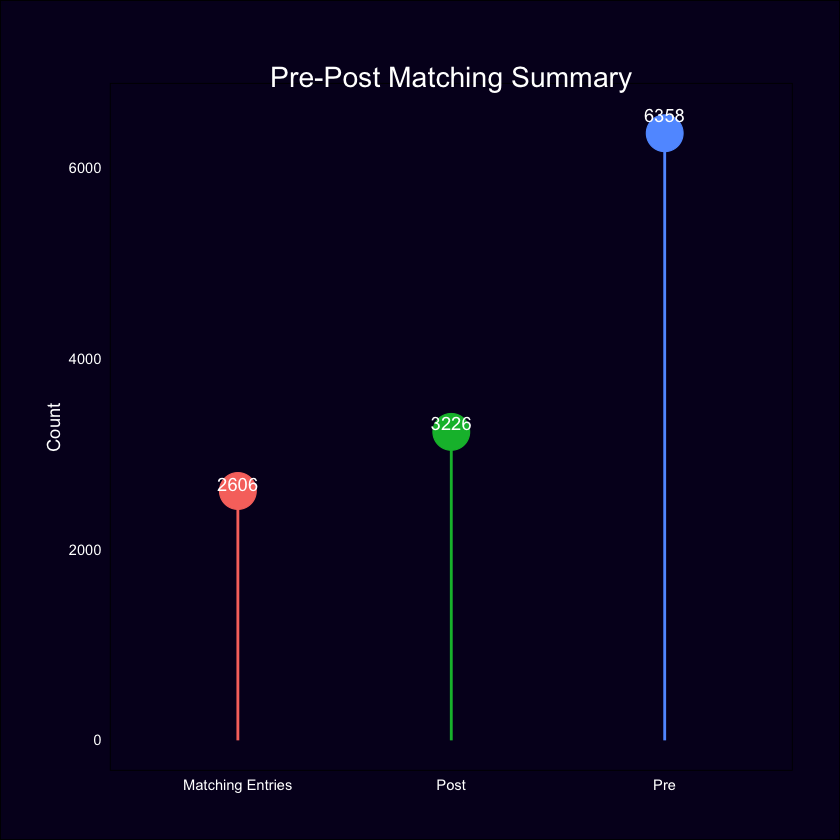

In [44]:
# plot the data
# Load the necessary library
library(ggplot2)

# Sample data
data_summary <- data.frame(
  dataset = c("Matching Entries", "Pre", "Post"),
  count = c(count_matched, count_df_pre, count_df_post)
)

ggplot(data_summary, aes(x = dataset, y = count, fill = dataset)) +
  geom_col(width = 0.005, aes(color = factor(dataset))) + geom_point(aes(color = factor(dataset)), size =10) +
  geom_text(aes(label = count), position = position_stack(vjust = 1.03), color = "white") +
  scale_fill_manual(values = c("Matching Entries" = "#0cb9f8", "Pre" = "#04d6b3", "Post" = "#ee7503")) +
  theme_minimal() +
  theme(plot.background = element_rect(fill = "#050022"),plot.margin = unit(c(1, 1, 1, 1), "cm"),
        panel.background = element_rect(fill = "#050022"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "white"),
        axis.line.y = element_blank(),
        axis.line.x = element_blank(),
        axis.text = element_text(color = "white"),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "none",
        axis.title.y = element_text(color = "white"), 
        plot.title = element_text(color = "white", size = 17, lineheight = 5, vjust = -2, hjust = 0.5)) +
  labs(title = "Pre-Post Matching Summary",
       y = "Count") +
  ylim(c(0, max(data_summary$count) + 200))
  #+ ggsave("/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/assets/count_summary.png", width = 8, height = 6, units = "in")

In [45]:
# Quality control
#Count the number of unique 'matched' entries in the 'Matched' column
unique_matched_count <- merged_df %>%
  filter(Matched == 'matched') %>%
  distinct(id) %>%
  nrow()

# Print the unique matched count
cat("Number of unique 'matched' entries:", unique_matched_count, "\n")

Number of unique 'matched' entries: 2606 


In [46]:
#check surveys that are matched but have post survey date before pre survey date. #nolint

library(dplyr)
library(lubridate)

filtered_rows <- merged_df %>%
  filter(
    Matched == 'matched',
    difftime(RecordedDate.x, RecordedDate.y, units = "day") > 1
  ) %>%
  select(RecordedDate.y, RecordedDate.x, Matched, id)

# Print the first 5 rows
print(head(filtered_rows, 10))

cat("There are", nrow(filtered_rows), "row(s) where the post survey date is before the pre-survey date with a difference of more than 1 day.") #nolint


        RecordedDate.y      RecordedDate.x Matched       id
1  2023-03-07 16:20:00 2023-05-15 14:05:00 matched A_A_01_A
2  2023-05-24 10:26:00 2023-05-30 08:53:00 matched A_A_04_B
3  2023-03-07 16:21:00 2023-05-03 15:22:00 matched A_A_04_M
4  2023-04-24 17:01:00 2023-05-18 10:39:00 matched A_A_04_P
5  2023-05-04 13:13:00 2023-05-18 10:37:00 matched A_A_07_8
6  2023-05-18 11:19:00 2023-05-25 08:58:00 matched A_A_07_R
7  2023-02-13 14:58:00 2023-05-15 14:05:00 matched A_A_07_S
8  2023-05-03 12:55:00 2023-05-30 09:28:00 matched A_A_11_H
9  2023-04-24 17:02:00 2023-05-24 10:55:00 matched A_A_12_A
10 2023-05-24 08:39:00 2023-05-26 10:17:00 matched A_A_12_F
There are 262 row(s) where the post survey date is before the pre-survey date with a difference of more than 1 day.

`There are atleast 262 records many matched records where post survey date is before pre-survey date by atleast 1 day. More background knowledge is needed if these is an error or is an accurate depiction of the data.`

>> `The correct practice is to remove these records from the dataset — if we are measuring growth then this might be misleading`

>> `from this point forward, I will clean for duplicates and treat those as invalid data`

In [47]:
# filter dataframe to include only responses where post-survey date is after pre-survey date #nolint

merged_df <- merged_df %>%
  arrange(id, desc(RecordedDate.y)) %>%
  group_by(id) %>%
  filter(RecordedDate.y >= RecordedDate.x) %>%
  slice_head(n = 1) %>%
  ungroup()

# Print the resulting data frame
head(merged_df)
nrow(merged_df)

id,Finished.x,RecordedDate.x,Q1_a,Q2_a,Q3_a,Q4_a,Pre,Finished.y,RecordedDate.y,Q1_b,Q2_b,Q3_b,Q4_b,Q5,Q6,Q7,Q8,Post,Matched
<chr>,<lgl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
A_A_01_C,TRUE,2023-05-01 12:21:00,Somewhat disagree,Disagree,Somewhat agree,Somewhat disagree,pre,TRUE,2023-05-01 13:02:00,Somewhat disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Strongly agree,Strongly agree,10,post,matched
A_A_01_D,TRUE,2023-05-02 14:13:00,Agree,Somewhat agree,Somewhat agree,Somewhat disagree,pre,TRUE,2023-05-02 14:58:00,Agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Somewhat agree,7,post,matched
A_A_01_M,TRUE,2023-04-24 16:19:00,Somewhat disagree,Somewhat agree,Neither agree nor disagree,Somewhat disagree,pre,TRUE,2023-04-24 17:01:00,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Somewhat agree,7,post,matched
A_A_02_A,TRUE,2023-05-03 13:03:00,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,pre,TRUE,2023-05-03 14:18:00,Agree,Agree,Somewhat agree,Somewhat disagree,Agree,Agree,Strongly agree,10,post,matched
A_A_02_C,TRUE,2023-03-26 15:06:00,Agree,Agree,Agree,Agree,pre,TRUE,2023-03-26 15:55:00,Agree,Agree,Agree,Agree,Agree,Agree,Agree,10,post,matched
A_A_02_I,TRUE,2023-04-14 10:46:00,Strongly agree,Strongly agree,Strongly agree,Strongly agree,pre,TRUE,2023-04-14 10:51:00,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,8,post,matched


[1] 2325

**4.3 check for consistency in the data.**
Tested by comparing the pre and pre survey matching rate.


In [48]:
#Pre-Post survey matching rate.

# Calculate the matching rate
matching_rate <- (unique_matched_count / nrow(df_pre)) * 100

# Print the matching rate
cat("Pre-Post Survey Matching Rate:", matching_rate, "%\n")

Pre-Post Survey Matching Rate: 40.98773 %


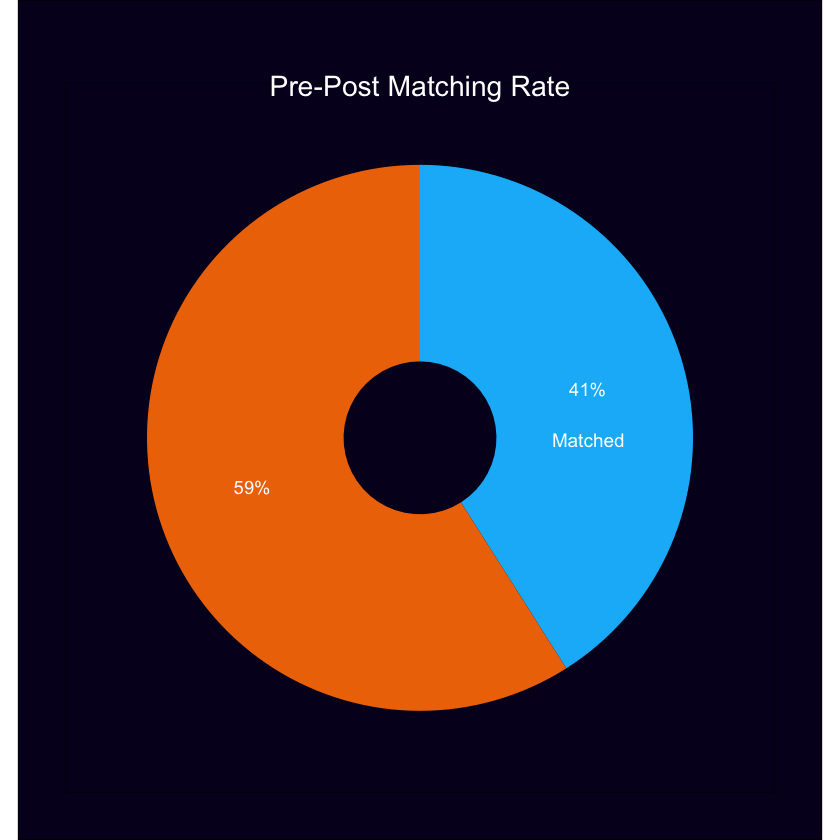

In [49]:
# plot completion rate

library(ggplot2)
library(dplyr)
# Calculate the complete rate and round it to one decimal place
complete <- round((matching_rate), 1)
# data
df <- data.frame(
  group = c("Matched", " "),
  value = c(complete, 100 - complete)
)

# Small hole
hsize <- 1

df <- df %>% 
  mutate(x = hsize)

ggplot(df, aes(x = x, y = value, fill = group)) +
  geom_col() +
  geom_text(aes(label = paste0(value, "%")), position = position_stack(vjust = 0.5), color = "#ffffff") +
  geom_text(aes(label = group, x = hsize -0.79), color = "white", size = 4, hjust = -1.8) +
  coord_polar(theta = "y") +
  xlim(c(0.2, hsize + 0.5)) +
  scale_fill_manual(values = c("Matched" = "#0cb9f8", " " = "#ee7503")) +
  theme_void() +
  theme(legend.position = "none",
        plot.background = element_rect(fill = "#050022"),plot.margin = unit(c(1, 1, 1, 1), "cm"),
        panel.background = element_rect(fill = "#050022"),
        axis.text = element_blank(),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
        plot.title = element_text(color = "white", size = 17, lineheight = 5, vjust = -2, hjust = 0.5))+
        labs(title = "Pre-Post Matching Rate",
             x = "Hole size",
             y = "Completion rate (%)",
             fill = "Group",
             color = "Group",
             size = "Group")
      # +ggsave("/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/assets/pre_post_match_rate.png", width = 8, height = 6, units = "in")



**4.4 Test for validity.** `Instructions is to keep the most recent response from the merged df. The assumption is that the most recent response is the most valid.`

`**Example** post survey date can not be before pre survey date.`
```python


>>This data is a sample pulled from a larger survey with additional variables that have been removed. When you join the data for analysis based on the ID, you might see that the pre and post RecordedDate’s differ substantially, suggesting that they were not submitted by the same respondent (eg. that there may be duplication among the participant IDs). In practice, we use additional variables to process these accurately, but you can ignore any of these discrepancies for the purposes of this case study and assume any duplicated participant IDs are true duplicates.

In [50]:
duplicate_rows <- merged_df[duplicated(merged_df$id), ]

nrow(duplicate_rows)

[1] 0

In [51]:
#Create a fresh copy of merged data
df <- data.frame(merged_df)

`Remove duplicates, keeping only the most recent response for each survey (pre and post) in the event of duplicate IDs. Exert the condition that post survey must be after pre survey.`

In [52]:
library(dplyr)

# Arrange the data by 'id' and 'RecordedDate.y' in descending order
# Then, keep only the first occurrence of each unique 'id' and filter by RecordedDate.y >= RecordedDate.x
df <- df %>%
  arrange(id, desc(RecordedDate.y)) %>%
  group_by(id) %>%
  filter(RecordedDate.y >= RecordedDate.x) %>%
  slice_head(n = 1) %>%
  ungroup()

# Print the resulting data frame
head(df)
nrow(df)

id,Finished.x,RecordedDate.x,Q1_a,Q2_a,Q3_a,Q4_a,Pre,Finished.y,RecordedDate.y,Q1_b,Q2_b,Q3_b,Q4_b,Q5,Q6,Q7,Q8,Post,Matched
<chr>,<lgl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
A_A_01_C,TRUE,2023-05-01 12:21:00,Somewhat disagree,Disagree,Somewhat agree,Somewhat disagree,pre,TRUE,2023-05-01 13:02:00,Somewhat disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Strongly agree,Strongly agree,10,post,matched
A_A_01_D,TRUE,2023-05-02 14:13:00,Agree,Somewhat agree,Somewhat agree,Somewhat disagree,pre,TRUE,2023-05-02 14:58:00,Agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Somewhat agree,7,post,matched
A_A_01_M,TRUE,2023-04-24 16:19:00,Somewhat disagree,Somewhat agree,Neither agree nor disagree,Somewhat disagree,pre,TRUE,2023-04-24 17:01:00,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Somewhat agree,7,post,matched
A_A_02_A,TRUE,2023-05-03 13:03:00,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,pre,TRUE,2023-05-03 14:18:00,Agree,Agree,Somewhat agree,Somewhat disagree,Agree,Agree,Strongly agree,10,post,matched
A_A_02_C,TRUE,2023-03-26 15:06:00,Agree,Agree,Agree,Agree,pre,TRUE,2023-03-26 15:55:00,Agree,Agree,Agree,Agree,Agree,Agree,Agree,10,post,matched
A_A_02_I,TRUE,2023-04-14 10:46:00,Strongly agree,Strongly agree,Strongly agree,Strongly agree,pre,TRUE,2023-04-14 10:51:00,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,8,post,matched


[1] 2325

**4.5 Quality Control**

In [53]:
#QC for duplicates
find_duplicate_rows <- function(input_df) {
  # Find duplicate rows based on the 'id' column
  duplicates <- input_df[duplicated(input_df$id) | duplicated(input_df$id, fromLast = TRUE), ]
  
  return(duplicates)
}

#QC for pre and post survey dates. Pre survey date should be before post survey date.
check_recorded_dates_order <- function(input_df) {
  # Check if RecordedDate.x is after RecordedDate.y
  dates_order_issue <- input_df[input_df$RecordedDate.x > input_df$RecordedDate.y, ]
  
  return(dates_order_issue)
}


# cat("Number of rows with all blank or NA values: ", nrow(find_rows_with_all_blank_na(df)), "\n")
cat ("Number of duplicate rows: ", nrow(find_duplicate_rows(df)), "\n")
cat ("Number of rows with pre-post survey issues", nrow(check_recorded_dates_order(df)), "\n")


Number of duplicate rows:  0 
Number of rows with pre-post survey issues 0 


In [54]:
#QC check for completeness of data. Check subset of columns for blank or NA values
blank_or_na_rows <- df %>%
  filter(Q1_a == "" | is.na(Q1_a) |
         Q2_a == "" | is.na(Q2_a) |
         Q3_a == "" | is.na(Q3_a) |
         Q4_a == "" | is.na(Q4_a) |
         Q1_b == "" | is.na(Q1_b) |
         Q2_b == "" | is.na(Q2_b) |
         Q3_b == "" | is.na(Q3_b) |
         Q4_b == "" | is.na(Q4_b) |
         Q5 == "" | is.na(Q5) |
         Q6 == "" | is.na(Q6) |
         Q7 == "" | is.na(Q7) |
         Q8 == "" | is.na(Q8))

blank_or_na_rows

id,Finished.x,RecordedDate.x,Q1_a,Q2_a,Q3_a,Q4_a,Pre,Finished.y,RecordedDate.y,Q1_b,Q2_b,Q3_b,Q4_b,Q5,Q6,Q7,Q8,Post,Matched
<chr>,<lgl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>


# 5. Convert likert scale data to numerical format for analysis. 

In [ ]:
head(df)

In [55]:
# get unique values of all columns

unique_values <- lapply(df, unique)

unique_values


$id
   [1] "A_A_01_C"                                                             
   [2] "A_A_01_D"                                                             
   [3] "A_A_01_M"                                                             
   [4] "A_A_02_A"                                                             
   [5] "A_A_02_C"                                                             
   [6] "A_A_02_I"                                                             
   [7] "A_A_02_S"                                                             
   [8] "A_A_03_C"                                                             
   [9] "A_A_03_G"                                                             
  [10] "A_A_03_M"                                                             
  [11] "A_A_03_S"                                                             
  [12] "A_A_03_W"                                                             
  [13] "A_A_04_F"                               

`7 point linkert scale used`
```python
scale = {
    'Strongly disagree': 1,
    'Disagree': 2,
    'Somewhat disagree': 3,
    'Neither agree nor disagree': 4,
    'Somewhat agree': 5,
    'Agree': 6,
    'Strongly agree': 7
}
```


In [56]:
library(dplyr)

# Define a function to map responses to numerical values
map_responses <- function(response) {
  mapping <- c('Strongly disagree' = 1, # nolint
               'Disagree' = 2, # nolint
               'Somewhat disagree' = 3,
               'Neither agree nor disagree' = 4,
               'Somewhat agree' = 5,
               'Agree' = 6,
               'Strongly agree' = 7)
  return(mapping[response])
}

# Apply the mapping function to the specified columns
df <- df %>%
  mutate(across(c(Q1_a,
                Q2_a,
                Q3_a,
                Q4_a,
                Q1_b,
                Q2_b,
                Q3_b,
                Q4_b,
                Q5,
                Q6,
                Q7),
                map_responses))

In [57]:
head(df)

id,Finished.x,RecordedDate.x,Q1_a,Q2_a,Q3_a,Q4_a,Pre,Finished.y,RecordedDate.y,Q1_b,Q2_b,Q3_b,Q4_b,Q5,Q6,Q7,Q8,Post,Matched
<chr>,<lgl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
A_A_01_C,TRUE,2023-05-01 12:21:00,3,2,5,3,pre,TRUE,2023-05-01 13:02:00,3,4,4,4,6,7,7,10,post,matched
A_A_01_D,TRUE,2023-05-02 14:13:00,6,5,5,3,pre,TRUE,2023-05-02 14:58:00,6,5,4,4,5,4,5,7,post,matched
A_A_01_M,TRUE,2023-04-24 16:19:00,3,5,4,3,pre,TRUE,2023-04-24 17:01:00,5,5,4,4,5,4,5,7,post,matched
A_A_02_A,TRUE,2023-05-03 13:03:00,4,4,4,4,pre,TRUE,2023-05-03 14:18:00,6,6,5,3,6,6,7,10,post,matched
A_A_02_C,TRUE,2023-03-26 15:06:00,6,6,6,6,pre,TRUE,2023-03-26 15:55:00,6,6,6,6,6,6,6,10,post,matched
A_A_02_I,TRUE,2023-04-14 10:46:00,7,7,7,7,pre,TRUE,2023-04-14 10:51:00,7,7,7,7,7,6,7,8,post,matched


In [ ]:
# write df to csv
#write.csv(final_df, "/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/data_output/final_df.csv", row.names = FALSE)

In [58]:
# write df to csv
write.csv(df, "/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/data_output/final_df_numeric.csv", row.names = FALSE)